### 2.4. Calculus

- Optimization addresses how to fit our models to training data, and **calculus** is its key prerequisite. 

- However, do not forget that our ultimate goal is to perform well on previously unseen data. 

- That problem is called **generalization** and will be a key focus of other chapters.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

#### 2.4.1. Derivatives and Differentiation


- Functions $f: \R \rightarrow \R$, that map from scalars to scalars, the *derivative* of $f$ at a point $x$ is defined as: <br>
       $$f'(x) =  \displaystyle{\lim_{h \to 0} \frac{f(x+h) - f(x)}h}$$

- Note that derivatives tell us the slope of a function at a particular location.
- When $f'(x)$ exists, $f$ is said to be *differentiable* at $x$; and when $f'(x)$  exists for all $x$ on a set, e.g., the interval [a, b].

- Not all functions are differentiable, such as accuracy and the area **under the receiving operating characteristic (AUC)**, we often *optimize a differentiable surrogate instead*.

In [2]:
# f(x) = 3x^2 - 4x
def f(x):
    return 3 * x ** 2 - 4 * x

# set x = 1 -> f'(1)
for h in 10.0 ** np.arange(-1, -6, -1):
    print(f'h = {h:.5f}, numerical limit = {(f(1+h) - f(1))/h:.5f}')

h = 0.10000, numerical limit = 2.30000
h = 0.01000, numerical limit = 2.03000
h = 0.00100, numerical limit = 2.00300
h = 0.00010, numerical limit = 2.00030
h = 0.00001, numerical limit = 2.00003


#### 2.4.2. Visualization Utilities

In [3]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

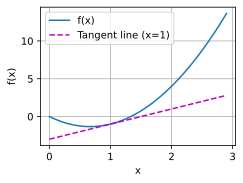

In [4]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

#### 2.4.3. Partial Derivatives and Gradients

- Functions $f: \R^n \rightarrow \R$, input is an n-dimensional vector $\mathbf{x} = [x_1, x_2, ..., x_n]^T$, output is a scalar:  <br>
$$\nabla_x f(\mathbf{x}) = [\partial_{x_1}f(\mathbf{x}), \partial_{x_2}f(\mathbf{x}), ... \partial_{x_n}f(\mathbf{x})]^T$$

- The following rules come in handy for differentiating multivariate functions:
    - For all $\mathbf{A} \in \R^{m \times n}$ we have $\nabla_x \mathbf{Ax} = \mathbf{A}^T$ and $\nabla_x \mathbf{x}^T\mathbf{A} = \mathbf{A}$
    
    - For square matrices $\mathbf{A} \in \R^{n \times n}$ we have that $\nabla_x \mathbf{x}^T\mathbf{Ax} = (\mathbf{A + A}^T)\mathbf{x}$ and in particular $\nabla_x \Vert\mathbf{x}\Vert^2 = \nabla_x \Vert\mathbf{x}^T\mathbf{x}\Vert = 2\mathbf{x}$.

    Similarly, for any matrix $\mathbf{X}$, we have $\nabla_{\mathbf{X}}\Vert\mathbf{X}\Vert^2 = 2\mathbf{X}$.

#### 2.4.4. Chain Rule

- Returning to functions of a single variable, suppose that $y = f(g(x))$ and that the underlying functions $y = f(u)$ and $u = g(x)$ are both differentiable.

$$\nabla_x y = \mathbf{A}\nabla_u y$$
- where $\mathbf{A} \in \R^{m \times n}$ is a matrix that contains the derivative of vector $\mathbf{u}$ with respect to vector $\mathbf{x}$. 

-  Thus, evaluating the gradient requires computing a vector–matrix product.

#### 2.4.5. Discussion

#### 2.4.6. Exercises

In [5]:
# Ex 1, 2, 3 -> he he

# Ex 4
'''
    f(x) = x^x
=> ln(f) = x * ln(x)
=> f'/f = ln(x) + 1
=> f' = x^x * (ln(x) + 1)
'''
import torch
x = torch.tensor(3. , requires_grad = True)
y = x**x
y.backward()
print(x.grad, x**x*(torch.log(x) + 1))

tensor(56.6625) tensor(56.6625, grad_fn=<MulBackward0>)


#### **Ex 5**

- When the first derivative is 0 at a given point, it means the tangent line is horizontal on a graph, or that the function is static at that point. 

- If it is true for the entire function it means that f(x) is a constant—that x does not affect the value in any way. It does not tell you what that constant is. All constants have their first derivative equal 0.

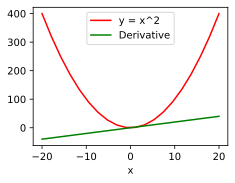

In [6]:
# Ex 5
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-20, 20, 20, requires_grad=True)
Y = x ** 2

# Calculate the scalar y (sum of Y) for gradient computation
y = torch.sum(Y)
y.backward()
# Y.backward(torch.ones_like(x))

# # Detach the tensor and convert to NumPy array for plotting
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'y = x^2', color='red')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative', color='green')

plt.xlabel('x')
plt.legend()

plt.show()

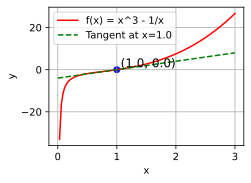

In [7]:
# Ex 6
import torch
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1/x

def tangent_line(x, x0, y0, slope):
    return y0 + slope * (x - x0)

# Define the point at which to compute the tangent
x_point = torch.tensor([1.0], requires_grad=True)

# Compute the function value and gradient at the point
y_point = f(x_point)
y_point.backward()  # Compute gradient (derivative) at x_point

# Get the gradient (slope of the tangent)
slope = x_point.grad.item()

# Generate x values for plotting
x_values = torch.linspace(0,3,100)
x_values_np = x_values.detach().numpy()

# Compute y values for the function
y_values = f(x_values)
y_values_np = y_values.detach().numpy()

# Compute y values for the tangent line
tangent_y_values = tangent_line(x_values, x_point.item(), y_point.item(), slope)
tangent_y_values_np = tangent_y_values.detach().numpy()

# Plot the function and the tangent line
plt.plot(x_values_np, y_values_np, label='f(x) = x^3 - 1/x', color='red')
plt.plot(x_values_np, tangent_y_values_np, label=f'Tangent at x={x_point.item()}', color='green', linestyle='--')

# Mark the point of tangency
plt.scatter([x_point.item()], [y_point.item()], color='blue')  # Tangency point
plt.text(x_point.item(), y_point.item(), f' ({x_point.item()}, {y_point.item()})', fontsize=12, verticalalignment='bottom')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


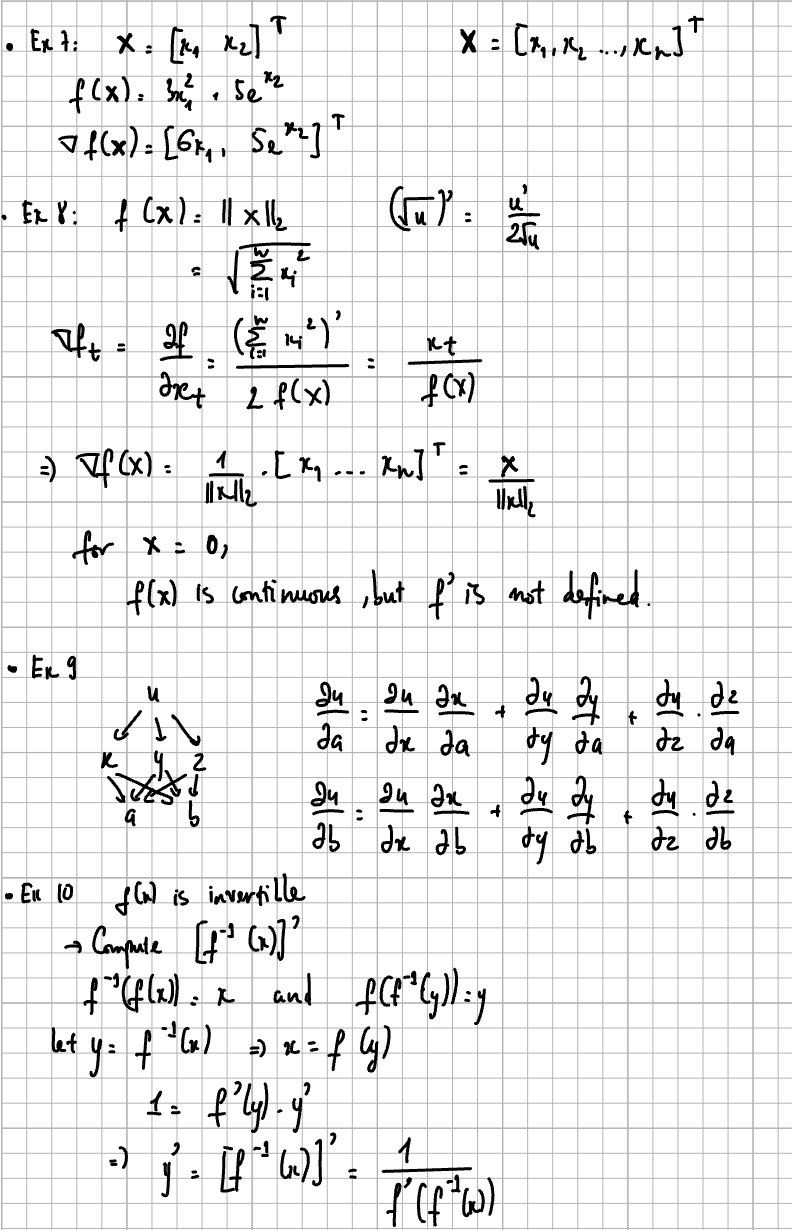

In [1]:
import os
from PIL import Image
im = Image.open(os.path.join('..', 'JupyterAI', 'assets/[2.4].png'))
im.resize((int(im.size[0]), int(im.size[1])))